In [1]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import logging
import logging
logging.basicConfig(filename='model.log',level=logging.INFO, filemode='w', format='%(asctime)s - %(levelname)s - %(message)s')

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
url1="https://raw.githubusercontent.com/Frisk516/Student_MLModel/refs/heads/main/StudentsPerformance.csv"
url2="https://raw.githubusercontent.com/Frisk516/Student_MLModel/refs/heads/main/StudentPerformanceFactors.csv"
df1=pd.read_csv(url1)
df2=pd.read_csv(url2)
df1.sample(frac=1)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
416,male,group C,bachelor's degree,standard,completed,71,74,68
391,female,group D,some college,standard,none,77,68,77
4,male,group C,some college,standard,none,76,78,75
100,male,group B,some college,standard,none,79,67,67
631,male,group B,high school,standard,none,79,60,65
...,...,...,...,...,...,...,...,...
594,female,group C,bachelor's degree,standard,completed,92,100,99
639,female,group D,associate's degree,standard,none,76,74,73
755,female,group E,associate's degree,standard,none,84,95,92
354,female,group C,some college,standard,none,59,71,70


In [3]:
df2.sample(frac=1)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
3071,30,63,Medium,High,Yes,8,96,Medium,Yes,4,Low,Medium,Private,Positive,3,No,Postgraduate,Near,Female,71
2497,18,71,Medium,Low,Yes,7,85,Low,Yes,1,Low,Low,Public,Neutral,2,No,High School,Moderate,Male,62
2014,25,99,Medium,Low,No,5,79,Low,Yes,2,Low,Medium,Public,Positive,4,No,College,Near,Female,71
1563,25,70,Medium,Medium,Yes,7,51,High,Yes,3,Low,Medium,Public,Positive,4,No,High School,Moderate,Male,66
5037,16,91,High,High,Yes,6,92,Low,Yes,2,Low,High,Private,Positive,3,No,High School,Moderate,Male,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6200,17,89,Medium,Medium,Yes,6,82,Medium,Yes,3,Medium,Medium,Private,Positive,3,No,College,Near,Female,70
1047,11,69,Medium,Medium,No,5,93,Medium,Yes,0,Medium,High,Public,Negative,4,No,College,Near,Male,63
679,28,65,Medium,Medium,Yes,4,64,Medium,Yes,6,Medium,High,Public,Neutral,3,No,Postgraduate,Near,Male,70
4352,19,80,High,High,Yes,7,67,Medium,Yes,2,Low,High,Public,Neutral,2,Yes,Postgraduate,Near,Female,68


In [4]:
#making sure we have a common target column
if {'math_score', 'reading_score', 'writing_score'}.issubset(df1.columns):
    # average the three scores for a general performance measure
    df1['exam_score'] = df1[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
elif {'math score', 'reading score', 'writing score'}.issubset(df1.columns):
    df1['exam_score'] = df1[['math score', 'reading score', 'writing score']].mean(axis=1)
else:
    raise ValueError("Couldn't find exam score columns in StudentsPerformance dataset")

In [5]:
#normalising column names
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')

In [6]:
#combining the two datasets
combined = pd.concat([df1, df2], ignore_index=True, sort=False)
print("Combined dataset shape:", combined.shape)

Combined dataset shape: (7607, 27)


In [7]:
combined


,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score,hours_studied,...,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,72.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0,82.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,92.666667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,49.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,male,group C,some college,standard,none,76.0,78.0,75.0,76.333333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,25.0,...,Yes,1.0,High,Medium,Public,Positive,2.0,No,High School,Near
7603,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.000000,23.0,...,Yes,3.0,Low,High,Public,Positive,2.0,No,High School,Near
7604,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,20.0,...,Yes,3.0,Low,Medium,Public,Negative,2.0,No,Postgraduate,Near
7605,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,10.0,...,Yes,2.0,Low,Medium,Private,Positive,3.0,No,High School,Far


In [8]:
#separating numerical and categorical columns
numerical = combined.select_dtypes(exclude=['object'])
categorical = combined.select_dtypes(include=['object'])

In [9]:
#performing EDA
from collections import OrderedDict
stats=[]
for i in numerical.columns:
    numerical_stats=OrderedDict({
        'feature':i,
        'mean':numerical[i].mean(),
        'median':numerical[i].median(),
        'mode':numerical[i].mode()[0],
        'std':numerical[i].std(),
        'min':numerical[i].min(),
        'max':numerical[i].max()
    })
    stats.append(numerical_stats)
report=pd.DataFrame(stats)


#checking outliers
outlier_label = []
for col in report['feature']:
    Q1 = combined[col].quantile(0.25)
    Q3 = combined[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR   # LW : Lower Whisker Line
    UW = Q3 + 1.5 * IQR   # UW : Upper Whisker Line
    outliers = combined[(combined[col] < LW) | (combined[col] > UW)]
    if not outliers.empty:
        outlier_label.append("Has Outliers")
    else:
        outlier_label.append("No Outliers")

report["Outlier Comment"] = outlier_label

report

,feature,mean,median,mode,std,min,max,Outlier Comment
0,math_score,66.089000,66.0,65.0,15.163080,0.0,100.0,Has Outliers
1,reading_score,69.169000,70.0,72.0,14.600192,17.0,100.0,Has Outliers
2,writing_score,68.054000,69.0,74.0,15.195657,10.0,100.0,Has Outliers
3,exam_score,67.305990,67.0,68.0,6.314806,9.0,101.0,Has Outliers
4,hours_studied,19.975329,20.0,20.0,5.990594,1.0,44.0,Has Outliers
5,attendance,79.977448,80.0,67.0,11.547475,60.0,100.0,No Outliers
6,sleep_hours,7.029060,7.0,7.0,1.468120,4.0,10.0,No Outliers
7,previous_scores,75.070531,75.0,66.0,14.399784,50.0,100.0,No Outliers
8,tutoring_sessions,1.493719,1.0,1.0,1.230570,0.0,8.0,Has Outliers
9,physical_activity,2.967610,3.0,3.0,1.031231,0.0,6.0,No Outliers


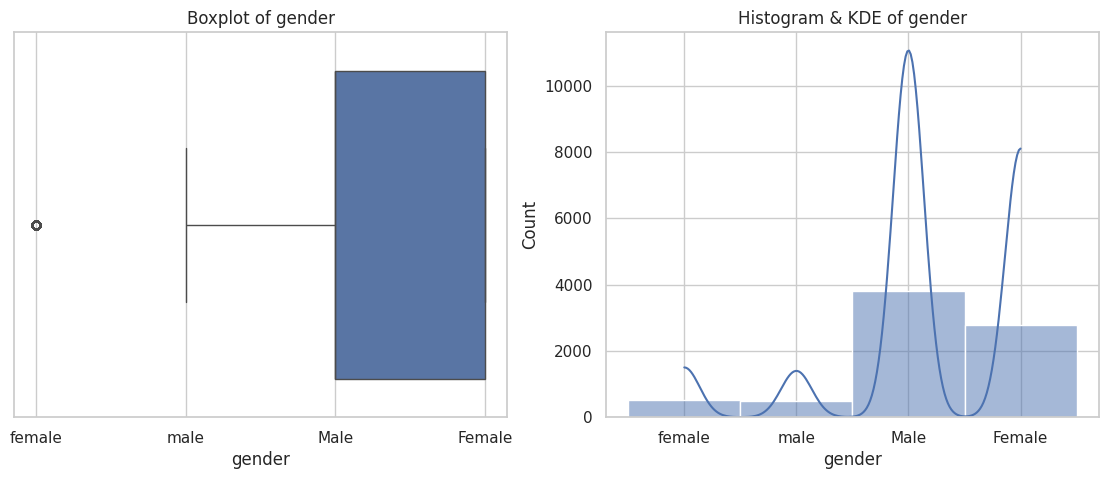

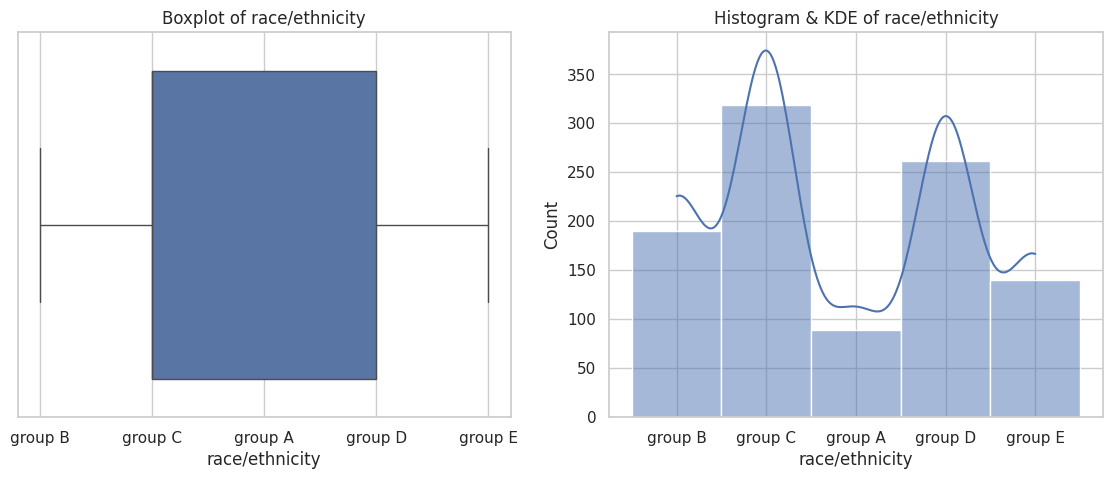

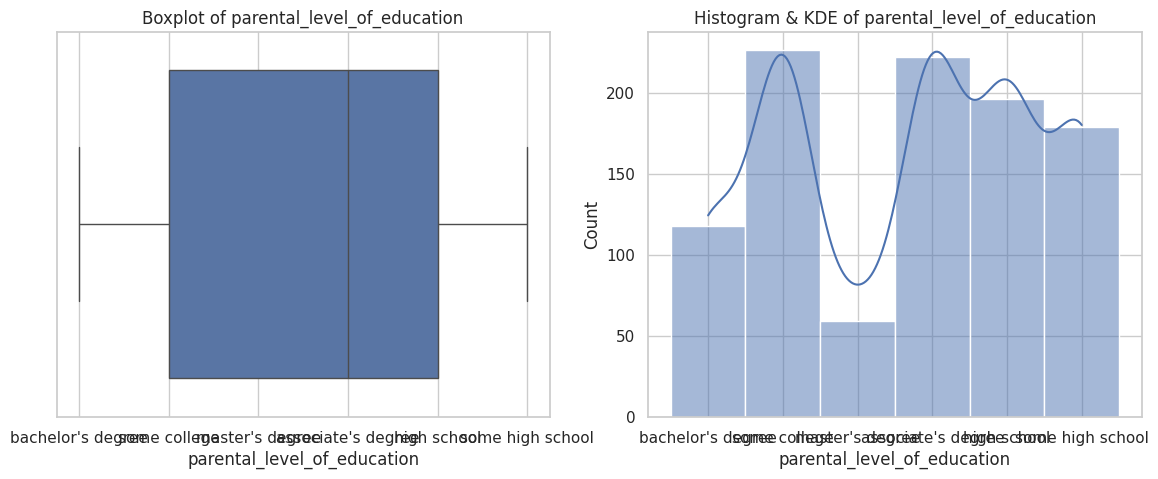

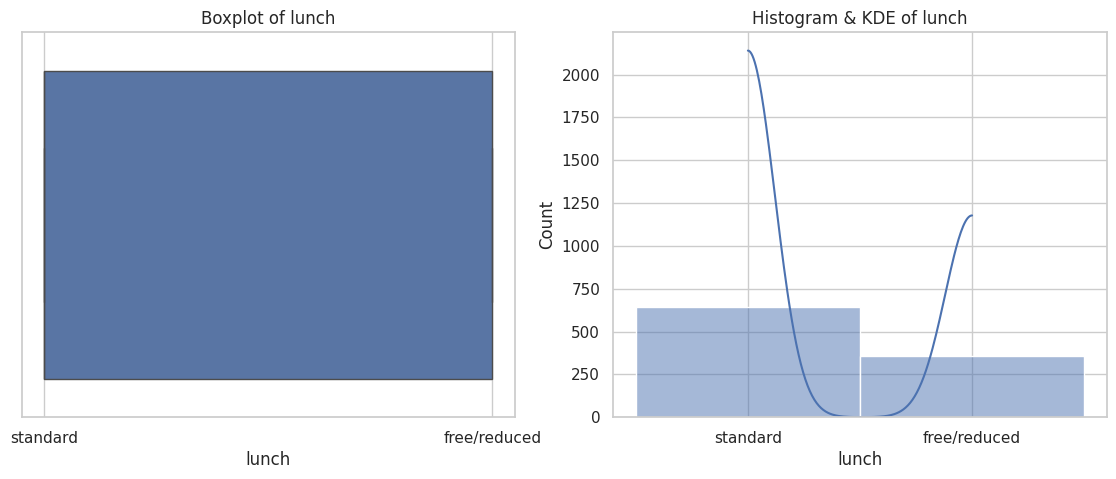

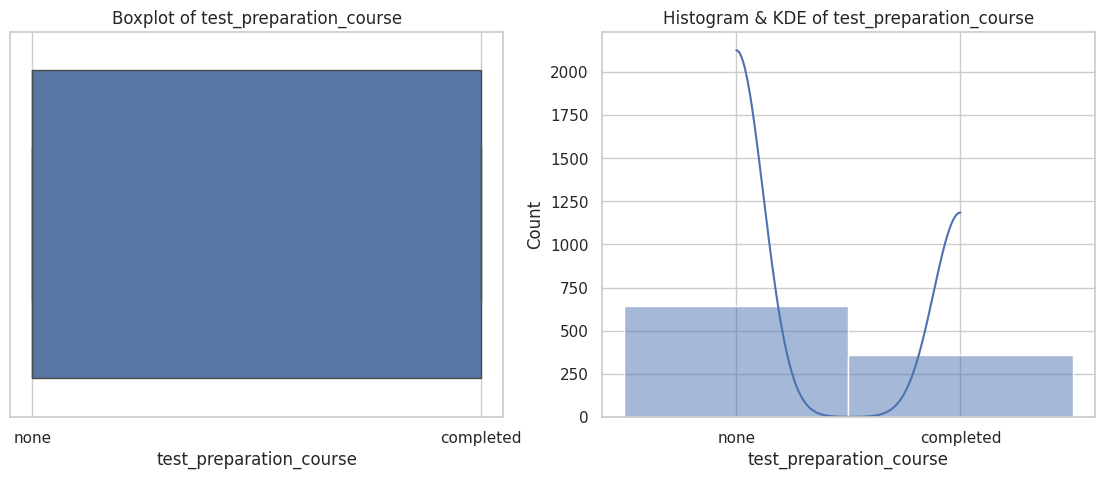

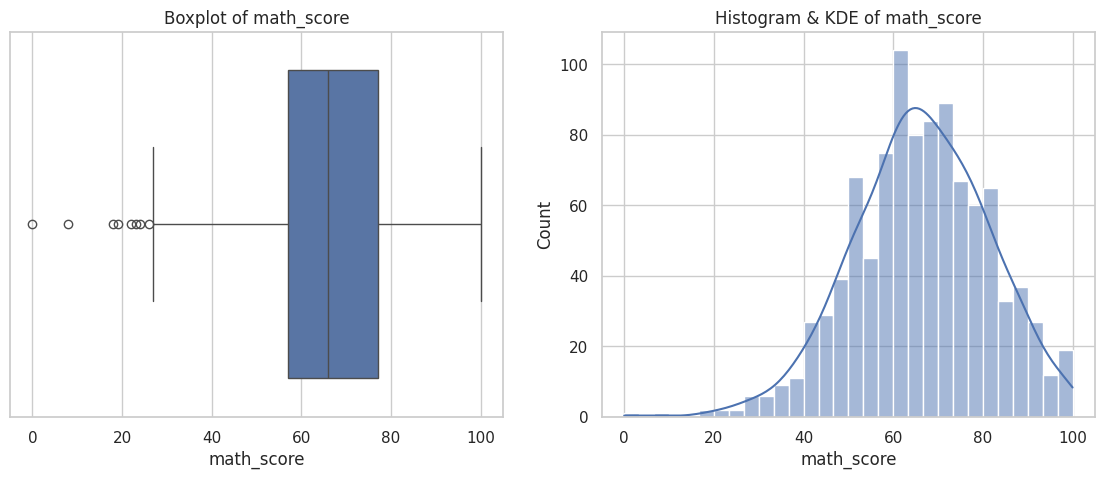

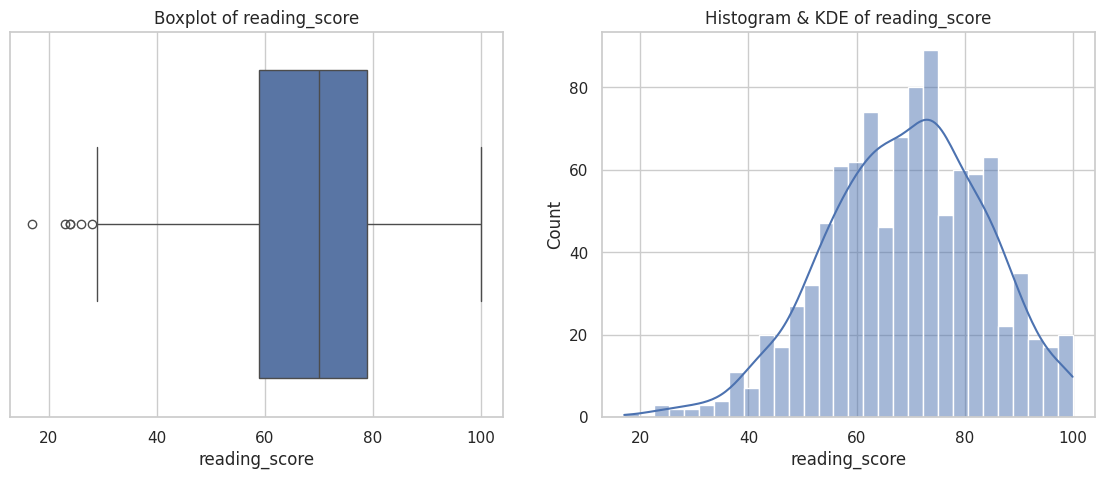

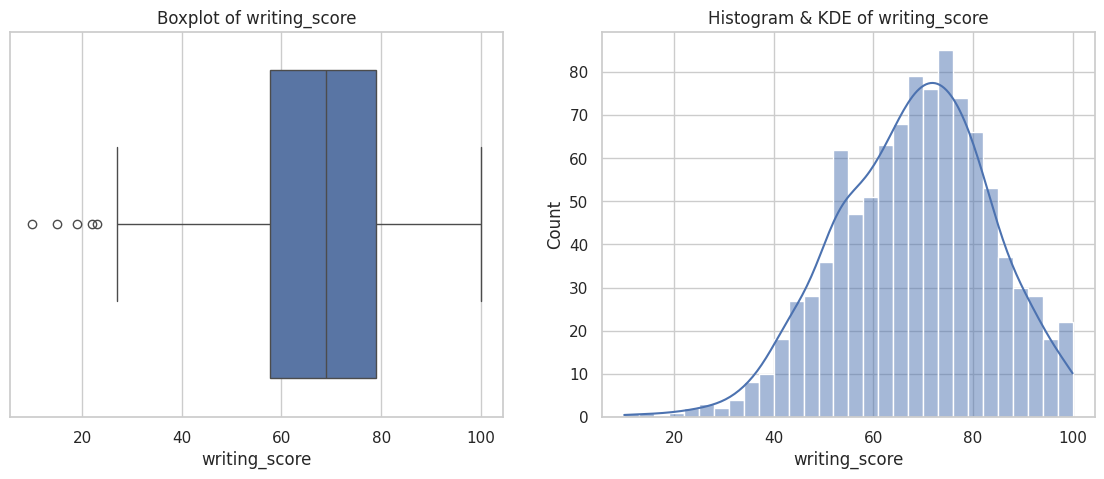

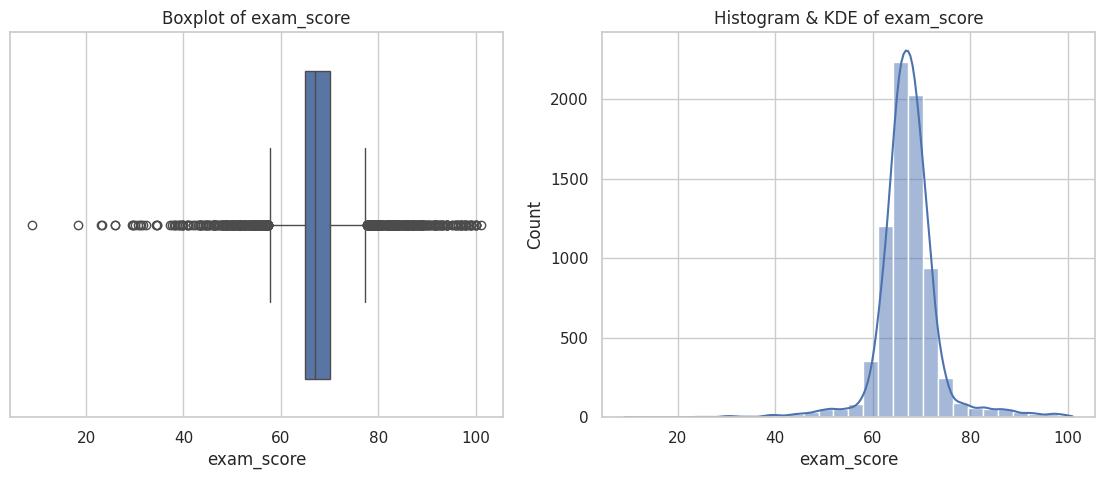

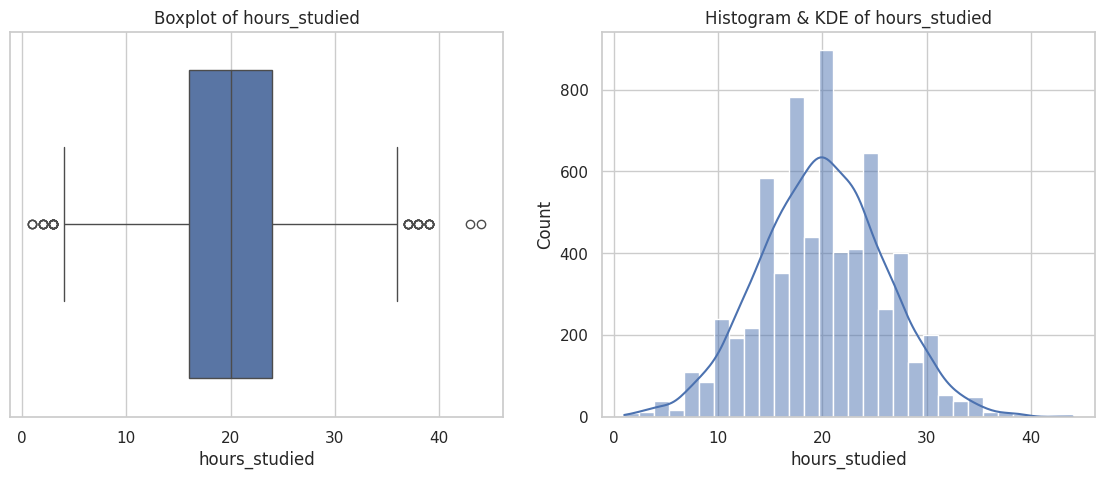

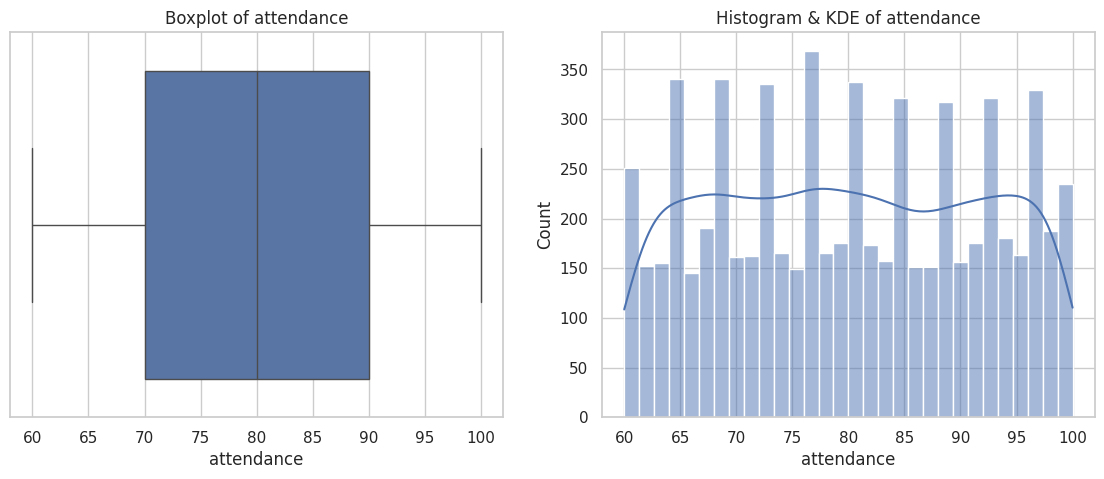

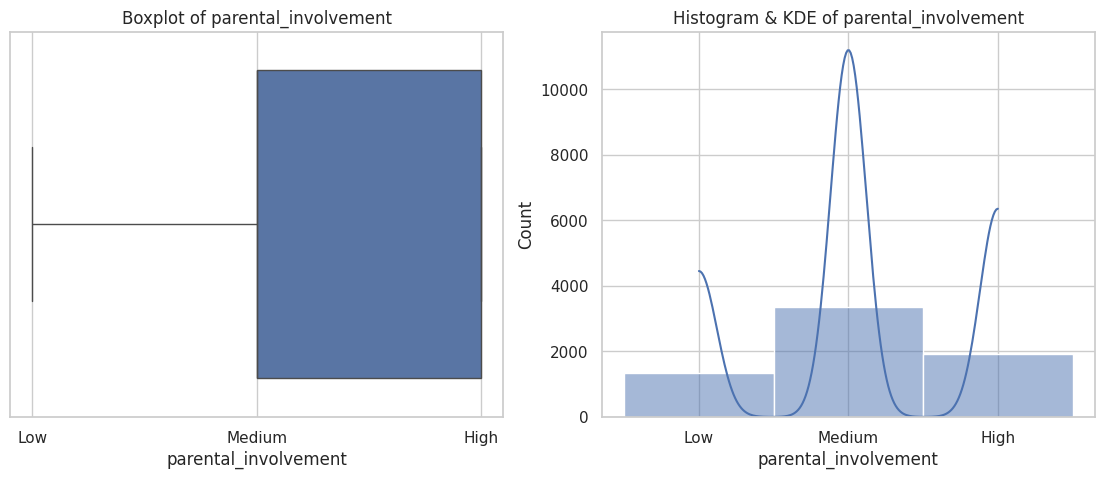

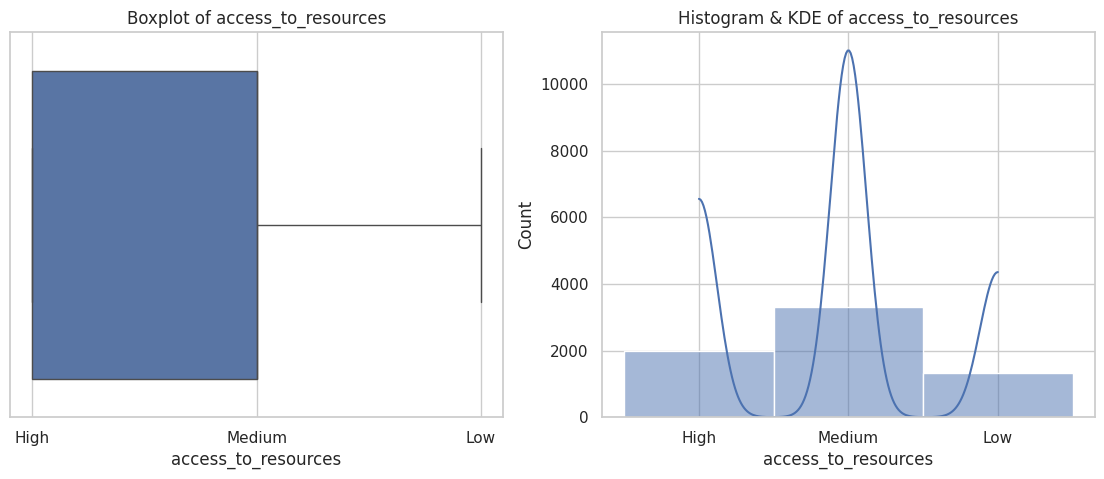

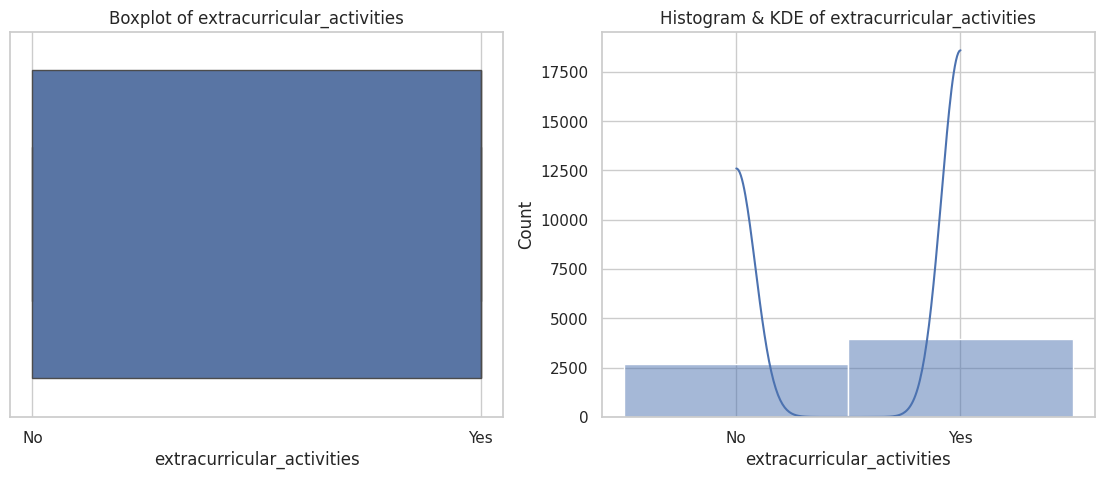

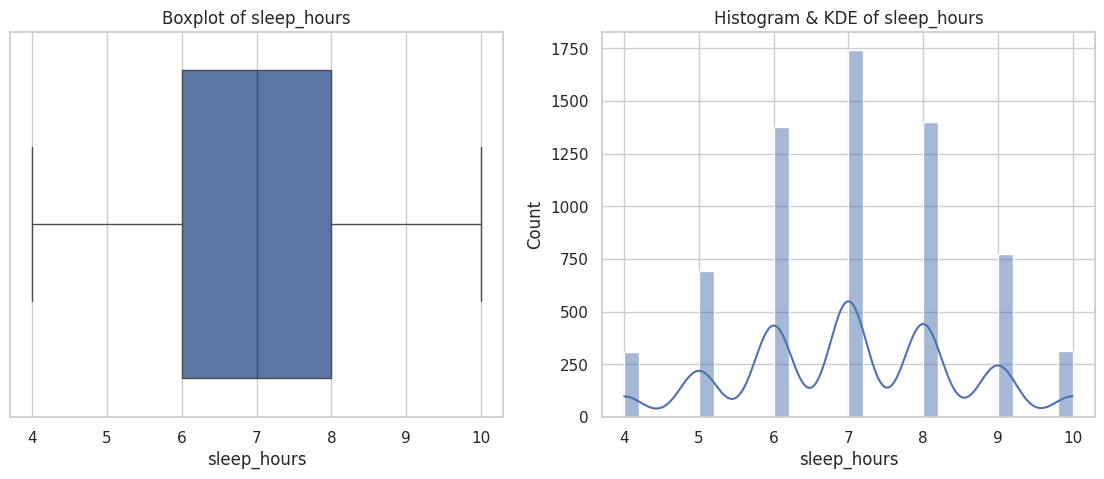

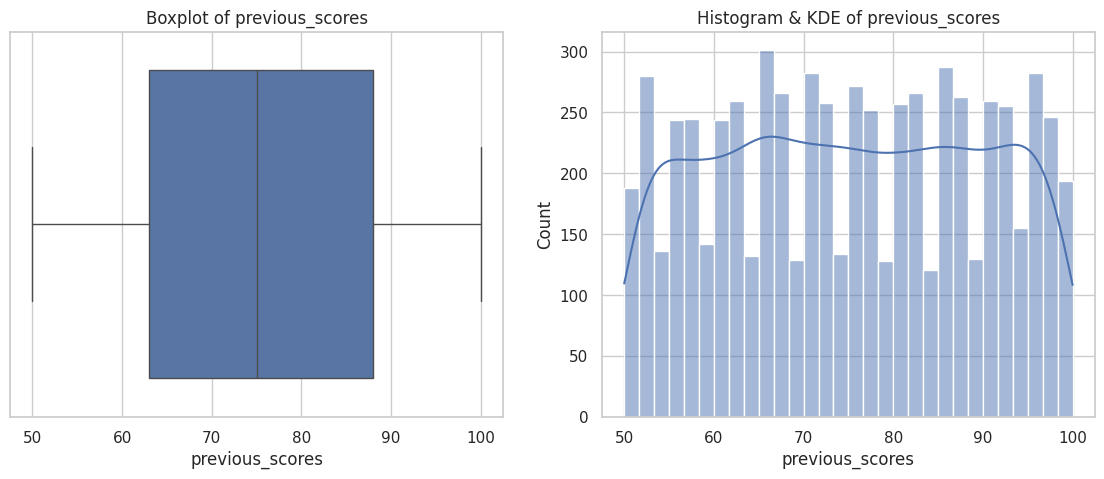

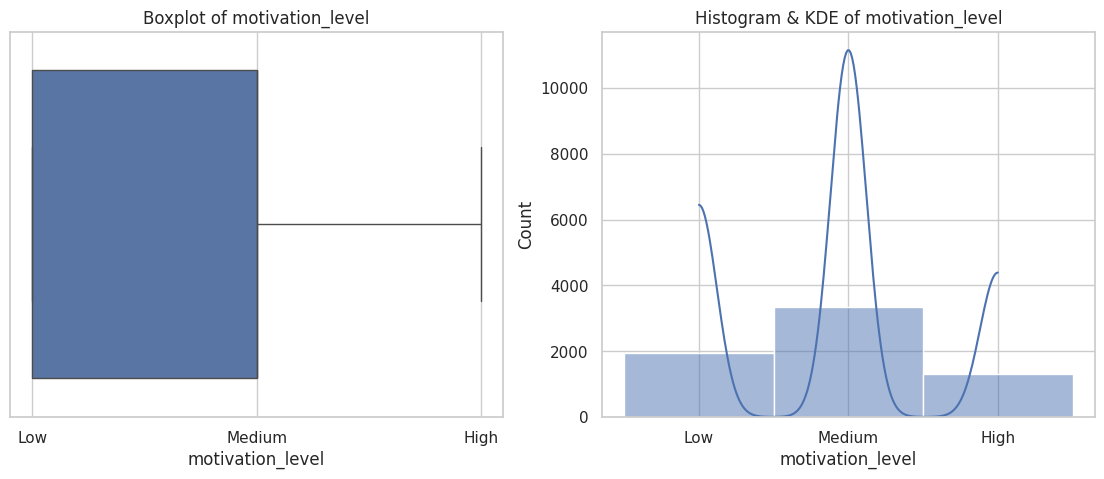

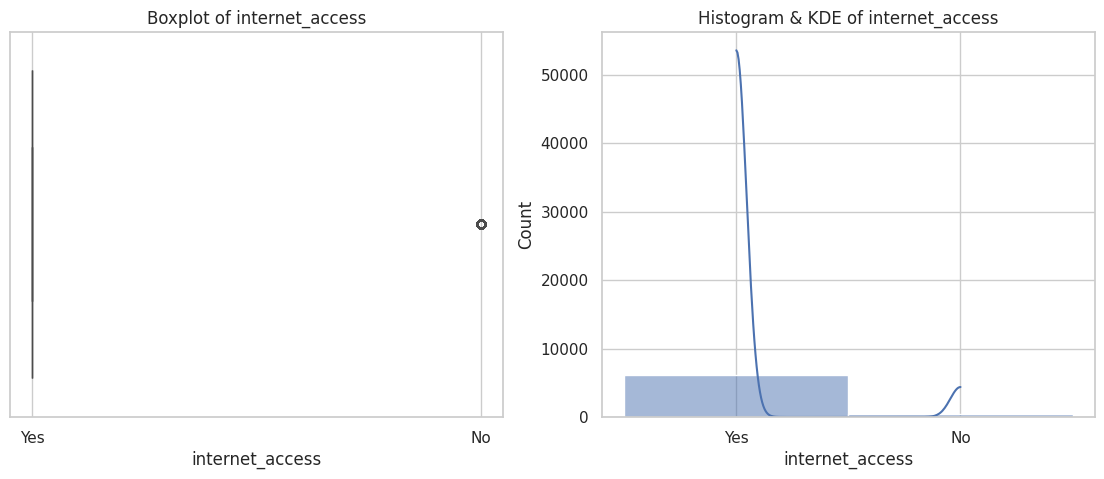

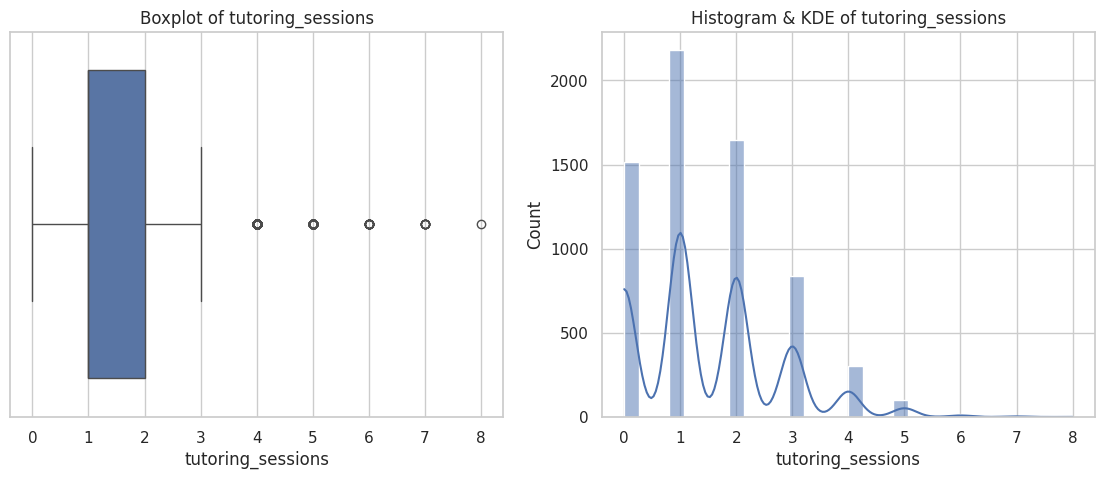

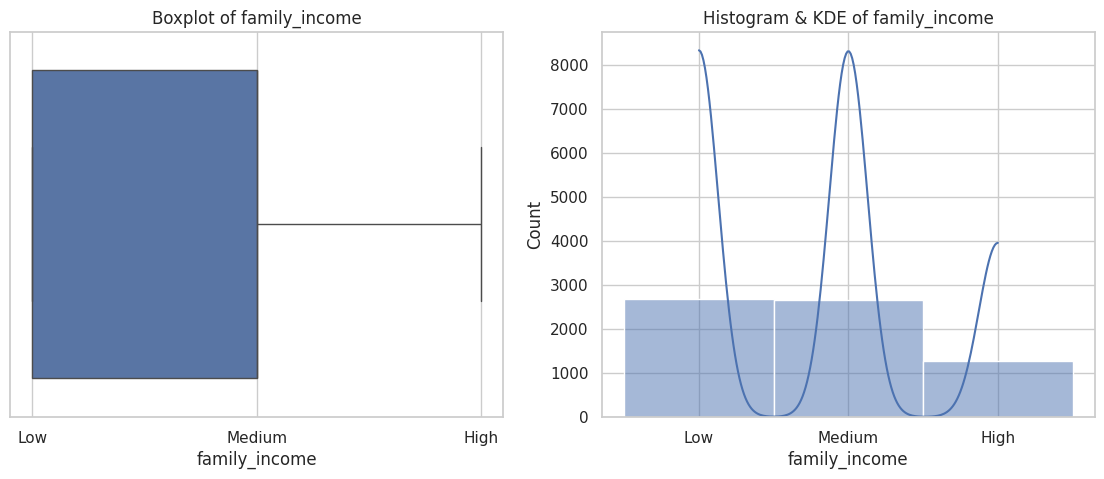

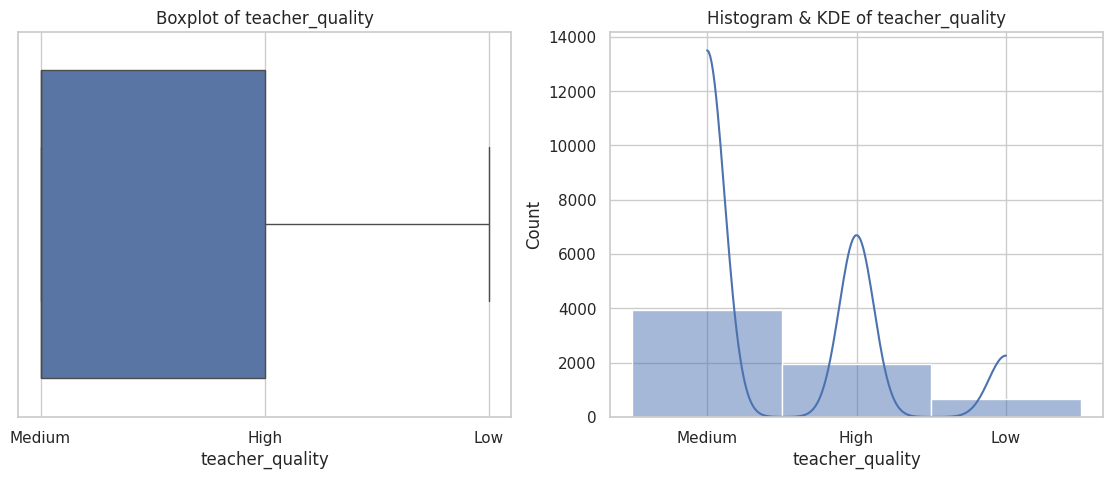

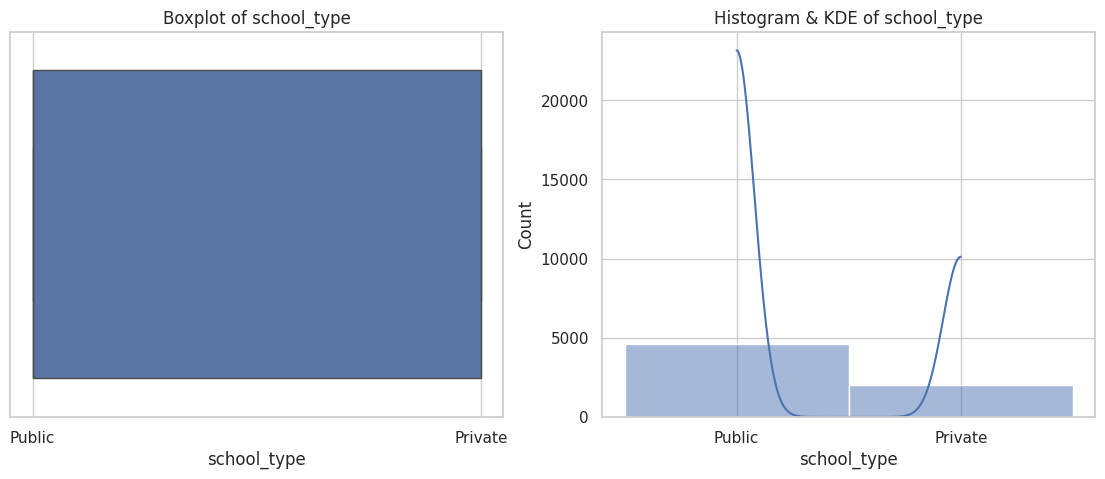

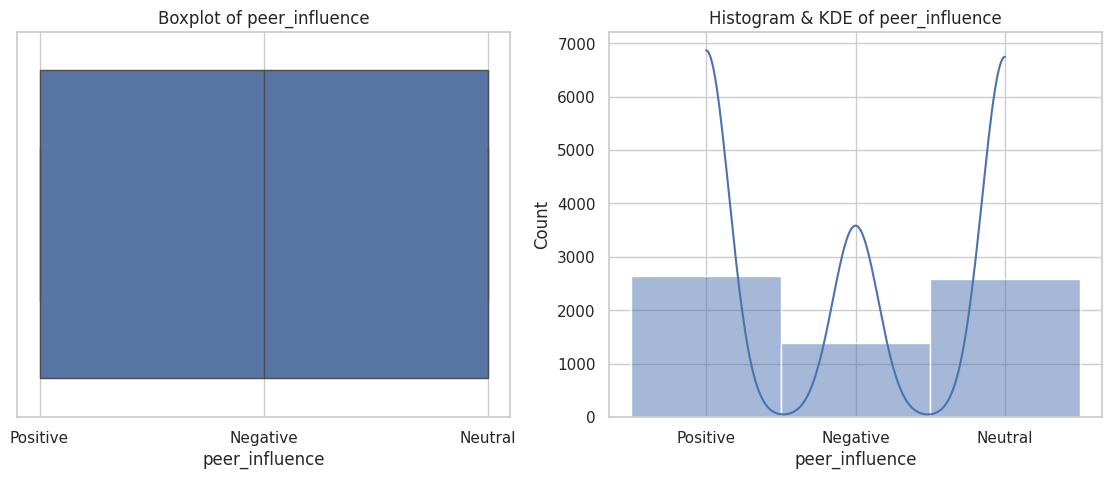

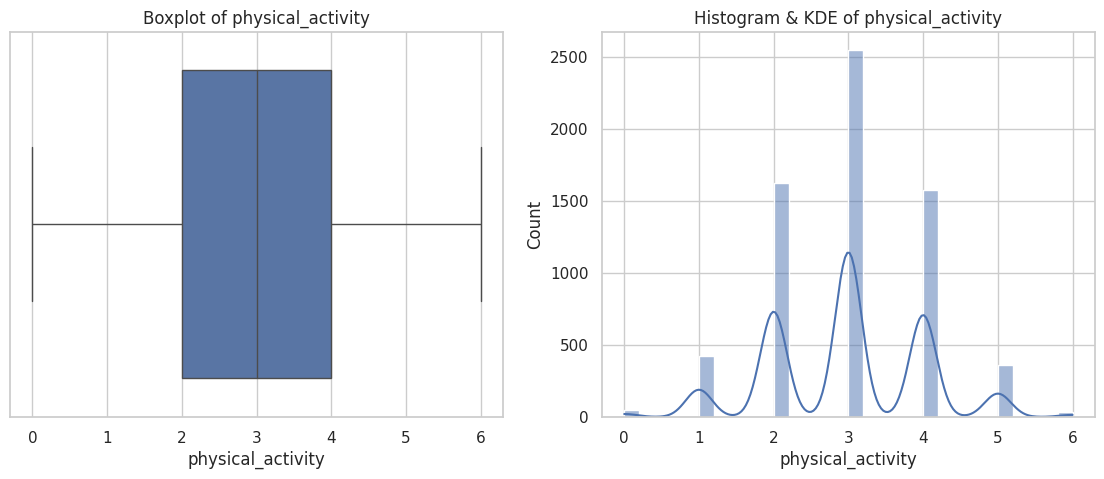

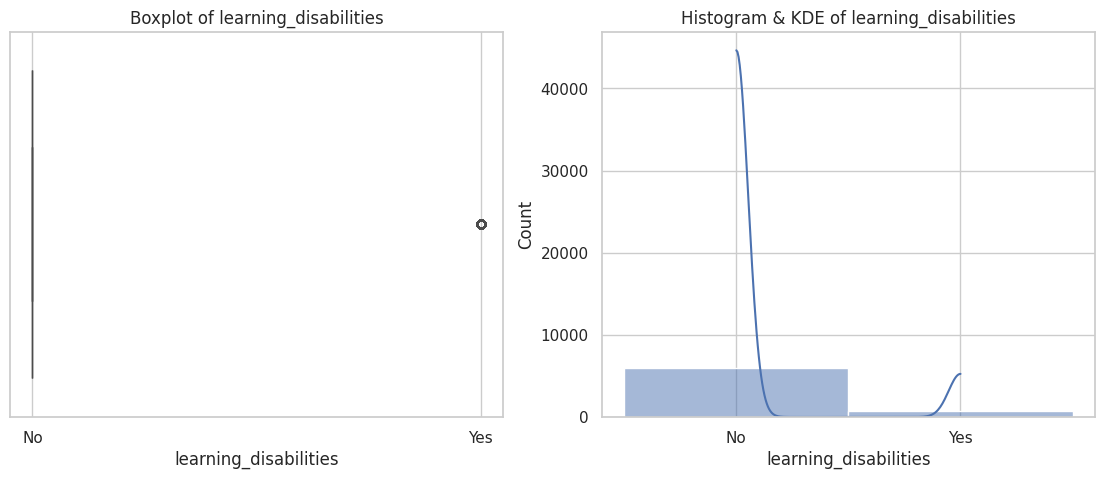

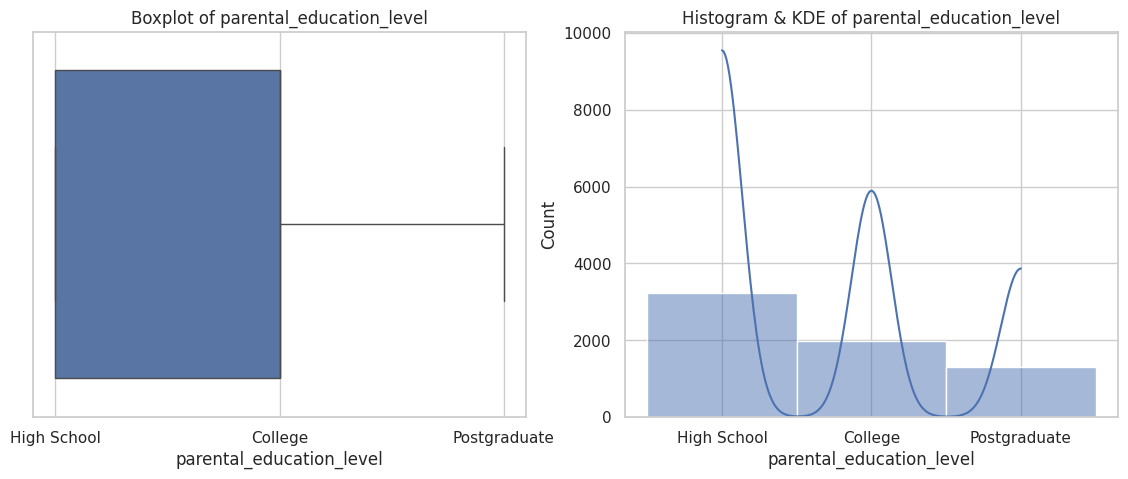

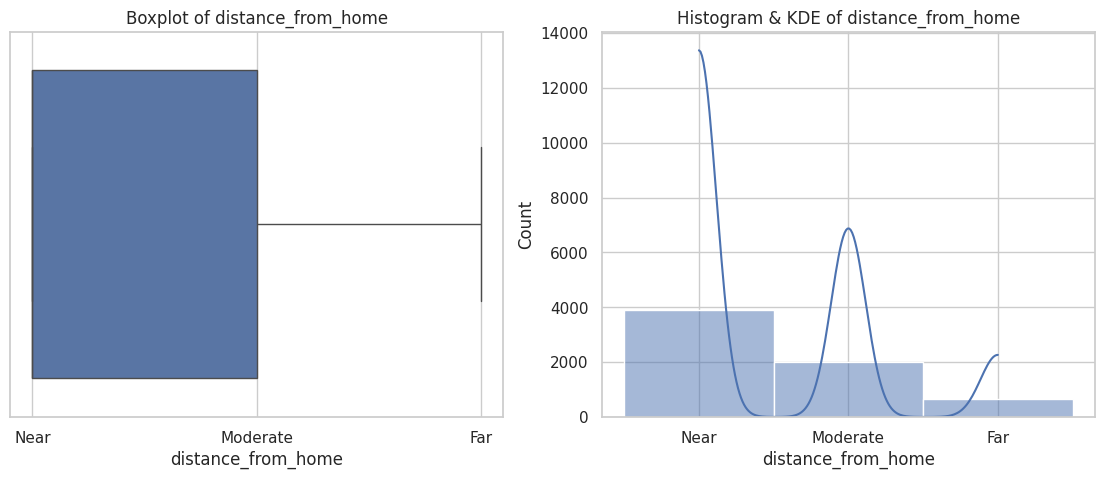

In [10]:
#checking plots for outliers and such
sns.set(style="whitegrid")

# Plot boxplots and bell curves for each numerical feature
for col in combined:
    plt.figure(figsize=(14, 5))

    # Boxplot (shows outliers as points beyond whiskers)
    plt.subplot(1, 2, 1)
    sns.boxplot(x=combined[col])
    plt.title(f'Boxplot of {col}')

    # Bell curve: histogram + KDE (to check distribution shape)
    plt.subplot(1, 2, 2)
    sns.histplot(combined[col], kde=True, bins=30)
    plt.title(f'Histogram & KDE of {col}')

    plt.show()

In [11]:
#using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col])

In [12]:
#checking null
combined.isna().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,6607
reading_score,6607
writing_score,6607
exam_score,0
hours_studied,1000


In [13]:
combined

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score,hours_studied,...,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home
0,2,1,1,1,1,72.0,72.0,74.0,72.666667,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
1,2,2,4,1,0,69.0,90.0,88.0,82.333333,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
2,2,1,3,1,1,90.0,95.0,93.0,92.666667,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
3,3,0,0,0,1,47.0,57.0,44.0,49.333333,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
4,3,2,4,1,1,76.0,78.0,75.0,76.333333,NaN,...,2,NaN,3,3,2,3,NaN,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,0,5,6,2,2,NaN,NaN,NaN,68.000000,25.0,...,1,1.0,0,2,1,2,2.0,0,1,2
7603,0,5,6,2,2,NaN,NaN,NaN,69.000000,23.0,...,1,3.0,1,0,1,2,2.0,0,1,2
7604,0,5,6,2,2,NaN,NaN,NaN,68.000000,20.0,...,1,3.0,1,2,1,0,2.0,0,2,2
7605,0,5,6,2,2,NaN,NaN,NaN,68.000000,10.0,...,1,2.0,1,2,0,2,3.0,0,1,0


In [14]:
#imputing null with median

combined['math_score'] = combined['math_score'].fillna(combined['math_score'].median())
combined['reading_score'] = combined['reading_score'].fillna(combined['reading_score'].median())
combined['writing_score'] = combined['writing_score'].fillna(combined['writing_score'].median())
combined['hours_studied'] = combined['hours_studied'].fillna(combined['hours_studied'].median())
combined['attendance'] = combined['attendance'].fillna(combined['attendance'].median())
combined['sleep_hours'] = combined['sleep_hours'].fillna(combined['sleep_hours'].median())
combined['previous_scores'] = combined['previous_scores'].fillna(combined['previous_scores'].median())
combined['tutoring_sessions'] = combined['tutoring_sessions'].fillna(combined['tutoring_sessions'].median())
combined['physical_activity'] = combined['physical_activity'].fillna(combined['physical_activity'].median())



In [15]:
combined.isna().sum()

,0
gender,0
race/ethnicity,0
parental_level_of_education,0
lunch,0
test_preparation_course,0
math_score,0
reading_score,0
writing_score,0
exam_score,0
hours_studied,0


In [16]:
#using labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in combined.select_dtypes(include='object').columns:
    combined[col] = le.fit_transform(combined[col])

In [17]:
combined

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,exam_score,hours_studied,...,internet_access,tutoring_sessions,family_income,teacher_quality,school_type,peer_influence,physical_activity,learning_disabilities,parental_education_level,distance_from_home
0,2,1,1,1,1,72.0,72.0,74.0,72.666667,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
1,2,2,4,1,0,69.0,90.0,88.0,82.333333,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
2,2,1,3,1,1,90.0,95.0,93.0,92.666667,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
3,3,0,0,0,1,47.0,57.0,44.0,49.333333,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
4,3,2,4,1,1,76.0,78.0,75.0,76.333333,20.0,...,2,1.0,3,3,2,3,3.0,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7602,0,5,6,2,2,66.0,70.0,69.0,68.000000,25.0,...,1,1.0,0,2,1,2,2.0,0,1,2
7603,0,5,6,2,2,66.0,70.0,69.0,69.000000,23.0,...,1,3.0,1,0,1,2,2.0,0,1,2
7604,0,5,6,2,2,66.0,70.0,69.0,68.000000,20.0,...,1,3.0,1,2,1,0,2.0,0,2,2
7605,0,5,6,2,2,66.0,70.0,69.0,68.000000,10.0,...,1,2.0,1,2,0,2,3.0,0,1,0


In [18]:
#train test split to prevent data leak

from sklearn.model_selection import train_test_split
X=combined.drop('exam_score',axis=1)
y=combined['exam_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [19]:
#dataset has a considerable number of outliers especially the target column so using robust scaler

from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression (linear activation by default)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Set early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# Predict on test data
y_pred_nn = model.predict(X_test).flatten()

# Evaluate the model
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)

model.summary()

print(f"\n📊 Neural Network Performance:")
print(f"R² Score     : {r2_nn:.4f}")
print(f"MAE          : {mae_nn:.4f}")
print(f"MSE          : {mse_nn:.4f}")
print(f"RMSE         : {mse_nn ** 0.5:.4f}")


Epoch 1/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3726.3992 - mae: 59.7965 - val_loss: 619.3153 - val_mae: 20.5249
Epoch 2/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 486.3181 - mae: 17.9747 - val_loss: 323.7793 - val_mae: 14.7051
Epoch 3/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 283.6046 - mae: 13.7654 - val_loss: 218.4934 - val_mae: 11.9846
Epoch 4/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 189.5890 - mae: 11.0678 - val_loss: 141.8341 - val_mae: 9.5913
Epoch 5/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.0299 - mae: 8.6219 - val_loss: 85.2377 - val_mae: 7.3753
Epoch 6/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 72.7936 - mae: 6.7339 - val_loss: 50.5813 - val_mae: 5.6020
Epoch 7/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 39.8815 - mae: 4.9065 - val_loss: 31.2194 - val_mae: 4.2191
Epoch 8/100
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.8860 - mae: 3.7827 - val_loss: 21.9564 - val_mae: 3.4700
Epoch 9/100
134

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,525 (45.02 KB)

 Trainable params: 3,841 (15.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,684 (30.02 KB)


📊 Neural Network Performance:
R² Score     : 0.8733
MAE          : 0.9537
MSE          : 5.1535
RMSE         : 2.2701
